In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
from scipy import stats

###Exercise 1

In [99]:
def func(t1, t2, reg):
    return (t1 - 3)**2 / 2 + (t2 - 1)**2 / 3 + reg(t1, t2)

def r0(l, t1, t2):
    return l*(t1**0 + t2**0)

def r1(l, t1, t2):
    return l*(abs(t1) + abs(t2))

def r2(l, t1, t2):
    return l*(t1**2 + t2**2)

def plotter(seq, reg, lamb, title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    pairs = np.array(list(product(seq, seq)))
    res = np.abs(func(pairs[:, 0], pairs[:, 1], lambda x, y: reg(lamb, x, y)))
    ax.plot_trisurf(pairs[:, 0], pairs[:, 1], res)
    plt.title(title)
    minimum = res.argmin()
    print('Minimum value of %f reached with values %f %f' % (res[minimum], pairs[minimum][0], pairs[minimum][ 1]))
    
    plt.show()
    
def get_min_pair(seq, reg, lamb):
    pairs = np.array(list(product(seq, seq)))
    res = np.abs(func(pairs[:, 0], pairs[:, 1], lambda x, y: reg(lamb, x, y)))
    minimum = res.argmin()
    return np.array([pairs[minimum], np.min(res)])
    

def plot_3d(x, y, z, title=''):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(x, y, z, s=5)
    plt.title(title)
    elev = 25
    azim = 60.5

    ax.set_zlabel('Lambda')
    ax.set_xlabel('First coord')
    ax.set_ylabel('Second coord')
    ax.view_init(elev, azim)
    plt.show()
    
    

In [4]:
seq = np.concatenate([np.linspace(-5, 5, 100), np.array([0])])

Minimum value of 2.000748 reached with values 2.979798 0.959596


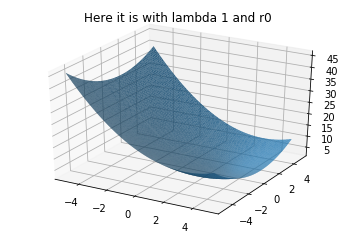

In [5]:
plotter(seq, r0, 1, 'Here it is with lambda 1 and r0')

Minimum value of 2.833792 reached with values 1.969697 0.000000


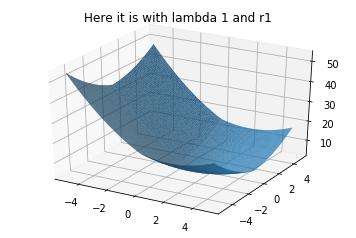

In [6]:
plotter(seq, r1, 1, 'Here it is with lambda 1 and r1')

Minimum value of 3.252457 reached with values 0.959596 0.252525


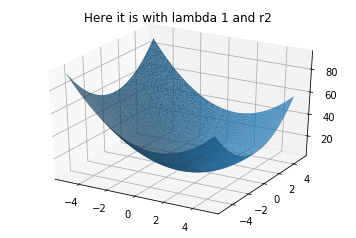

In [7]:
plotter(seq, r2, 1, 'Here it is with lambda 1 and r2')

In [40]:
coordStore = np.zeros((3, 1000, 2))

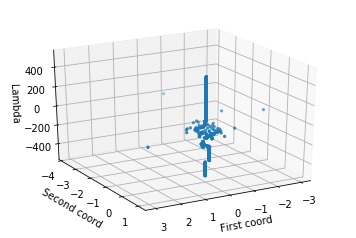

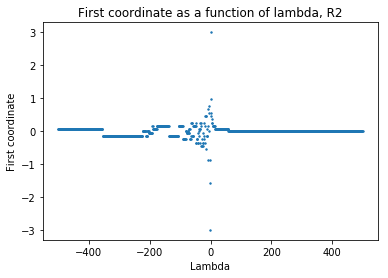

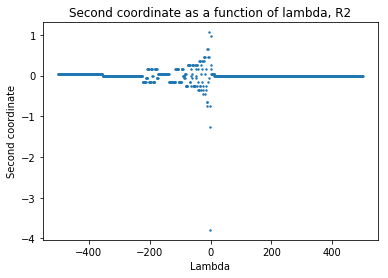

In [100]:
lambdas = np.arange(-500, 500)
seq = np.concatenate([np.linspace(-5, 5, 100), np.array([0])])

res = np.array([get_min_pair(seq, r2, l) for l in lambdas])
coords = np.array(list(map(lambda x: np.array([x[0], x[1]]), res[:, 0])))

plot_3d(coords[:, 0], coords[:, 1], lambdas, '')
coordStore[2] = coords

plt.scatter(lambdas, coords[:, 0], s=2)
plt.title('First coordinate as a function of lambda, R2')
plt.xlabel('Lambda')
plt.ylabel('First coordinate')
plt.show()
plt.scatter(lambdas, coords[:, 1], s=2)
plt.title('Second coordinate as a function of lambda, R2')
plt.xlabel('Lambda')
plt.ylabel('Second coordinate')
plt.show()

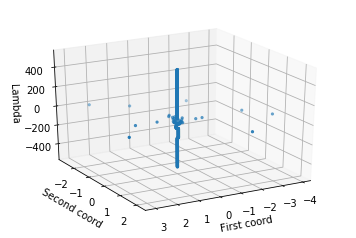

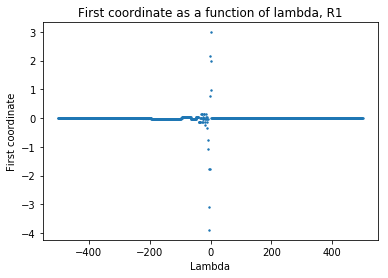

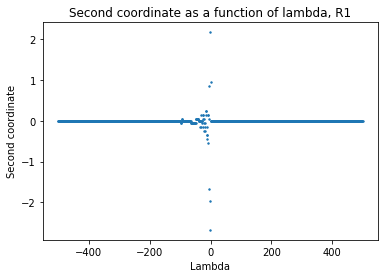

In [101]:
lambdas = np.arange(-500, 500)
seq = np.concatenate([np.linspace(-5, 5, 100), np.array([0])])

res = np.array([get_min_pair(seq, r1, l) for l in lambdas])
coords = np.array(list(map(lambda x: np.array([x[0], x[1]]), res[:, 0])))

plot_3d(coords[:, 0], coords[:, 1], lambdas, '')

coordStore[1] = coords

plt.scatter(lambdas, coords[:, 0], s=2)
plt.title('First coordinate as a function of lambda, R1')
plt.xlabel('Lambda')
plt.ylabel('First coordinate')
plt.show()
plt.scatter(lambdas, coords[:, 1], s=2)
plt.title('Second coordinate as a function of lambda, R1')
plt.xlabel('Lambda')
plt.ylabel('Second coordinate')
plt.show()

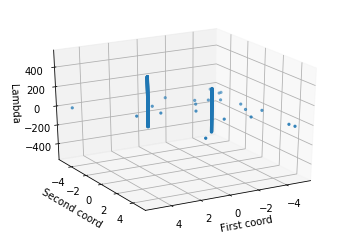

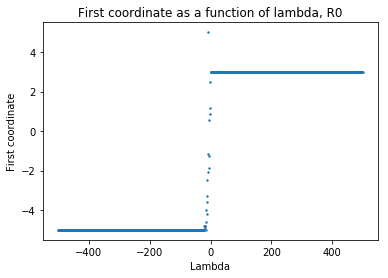

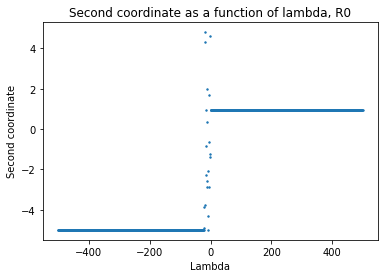

In [102]:
lambdas = np.arange(-500, 500)
seq = np.concatenate([np.linspace(-5, 5, 100), np.array([0])])

res = np.array([get_min_pair(seq, r0, l) for l in lambdas])
coords = np.array(list(map(lambda x: np.array([x[0], x[1]]), res[:, 0])))

plot_3d(coords[:, 0], coords[:, 1], lambdas, '')

coordStore[0] = coords

plt.scatter(lambdas, coords[:, 0], s=2)
plt.title('First coordinate as a function of lambda, R0')
plt.xlabel('Lambda')
plt.ylabel('First coordinate')
plt.show()
plt.scatter(lambdas, coords[:, 1], s=2)
plt.title('Second coordinate as a function of lambda, R0')
plt.xlabel('Lambda')
plt.ylabel('Second coordinate')
plt.show()

In [92]:
for ind in range(0,3):
    print('\n\n\n\n\nRESULTS FOR R%i' % ind)
    i = coordStore[ind] 
    
    oneMask = ((i[:, 0] == 0) & (i[:, 1] != 0)) | ((i[:, 0] != 0) & (i[:, 1] == 0))
    oneZero = i[oneMask]
    twoZero = i[((i[:, 0] == 0) & (i[:, 1] == 0))]
    if len(oneZero) > 0:
        print('Unique solutions where one coordinate is zero for R%i\n' % ind, np.unique(oneZero, axis=0))
        print('Lambda values \n', lambdas[oneMask])
    else:
        print('No coordinates where only one is zero for R%i' % ind)
    if len(twoZero) > 0:
        print('Number of pairs where both coordinates were zero %i' % len(twoZero))
        print('Lambda values \n', lambdas[oneMask])
    else:
        print('No coordinates where only one is zero for R%i' % ind)
        






RESULTS FOR R0
No coordinates where only one is zero for R0
No coordinates where only one is zero for R0





RESULTS FOR R1
Unique solutions where one coordinate is zero for R1
 [[-0.15151515  0.        ]
 [-0.05050505  0.        ]
 [ 0.         -0.25252525]
 [ 0.         -0.15151515]
 [ 0.         -0.05050505]
 [ 0.          0.05050505]
 [ 0.          0.15151515]
 [ 0.05050505  0.        ]
 [ 0.15151515  0.        ]
 [ 0.95959596  0.        ]
 [ 1.96969697  0.        ]]
Lambda values 
 [-194 -193 -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181
 -180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153
 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139
 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125
 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111
 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97
  -96